<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [13]:
class Face:
  def __init__(self):
    self.detector = MTCNN()

  def draw_facebox(self, filename): # this method draws a box around detected faces
    pixels = np.asarray(filename)
    pyplot.imshow(pixels)
    results = self.detector.detect_faces(pixels)
    ax = pyplot.gca()
    for result in results:
        x, y, width, height = result['box']
        rect = pyplot.Rectangle((x, y), width, height, fill=False, color='orange')
        ax.add_patch(rect)
    pyplot.show()

  def cover_facebox(self, filename, radius, color):
    # this method finds keypoints and covers them with a circle
    pixels = np.asarray(filename)
    pyplot.imshow(pixels)
    results = self.detector.detect_faces(pixels)
    ax = pyplot.gca()
    for result in results:
      for key, value in result['keypoints'].items():
        # create and draw dot
        dot = pyplot.Circle(value, radius = radius, color = color)
        ax.add_patch(dot)
    return ax

  def extract_face(self, filename, required_size=(224, 224)):
  # you need to specify the size, it is 224 by 224 by default.
  # This function accepts a filename (you can change it with an opened file),
  # a detector which is an already trained neural network and returns a list of embedings
  # the size of the list shows the number of detected faces.
    pixels = np.asarray(filename)#pyplot.imread(filename)
    results = self.detector.detect_faces(pixels)
    if len(results)==0:
        return 0
    res = []
    for result in results:
        x1, y1, width, height = result['box']
        x2, y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face.copy())
        image = image.resize(required_size)
        face_array = asarray(image)
        res.append(face_array)
    return res

  def look_for_faces(self, file_name, show=True):
    # this would be one api for face detection. However, we should wrap them
    # in a class.
    pixels = self.extract_face(file_name)
    if pixels ==0:
      print("No face has been detected!")
    else:
      if show:
        for pixel in pixels:
          pyplot.imshow(pixel)
          pyplot.show()
      else:
        print(len(pixels), "faces have been detected!")

In [14]:
face = Face()

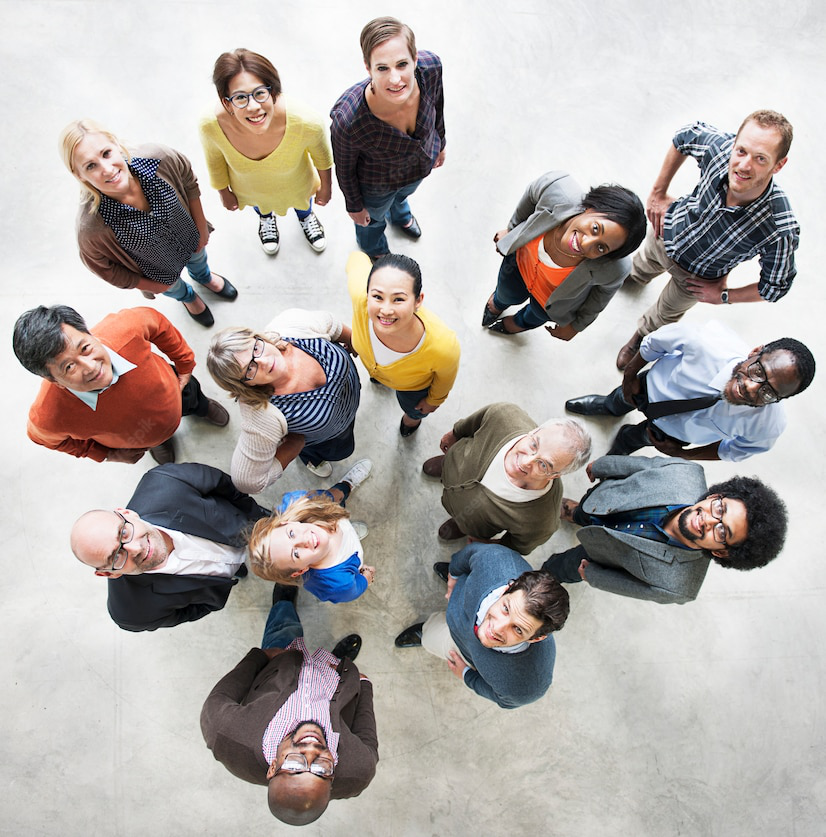

In [10]:
from urllib.request import urlopen
from PIL import Image
url = "https://img.freepik.com/premium-photo/blurred-vision-diverse-people_53876-10652.jpg?w=826"
img = Image.open(urlopen(url))
img

4/4 [==============================] - 0s 4ms/step


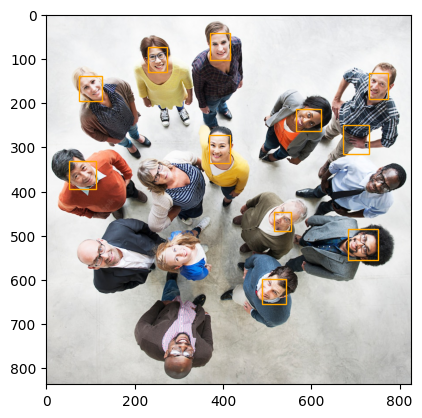

In [15]:
face.draw_facebox(img)

4/4 [==============================] - 0s 4ms/step


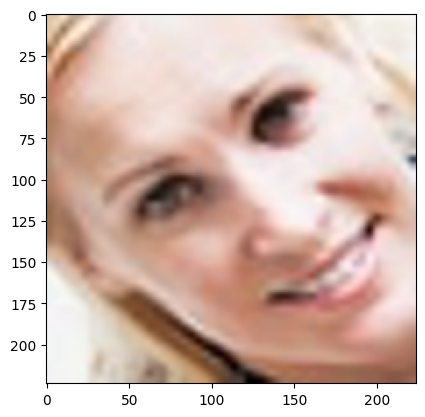

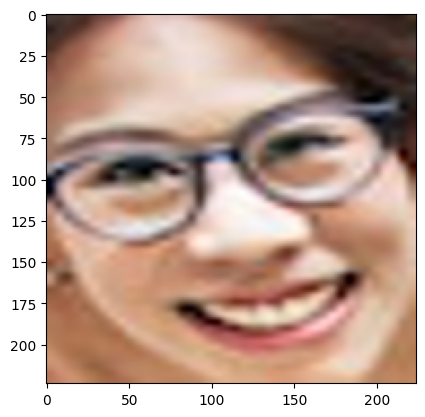

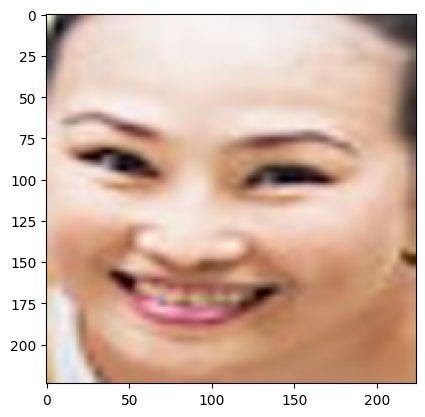

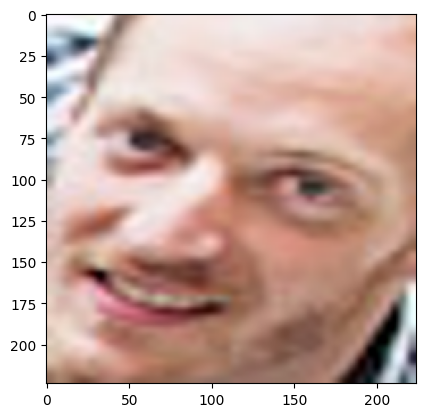

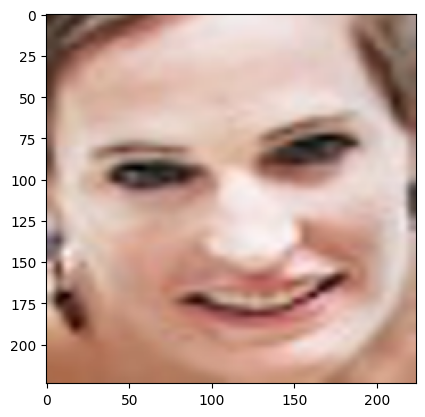

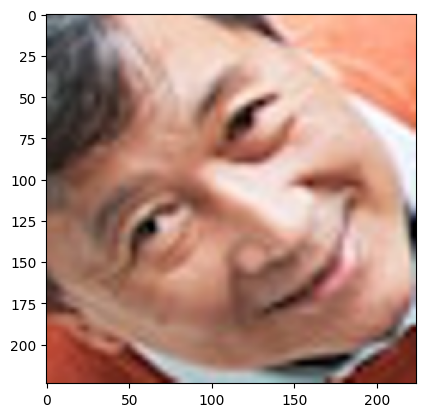

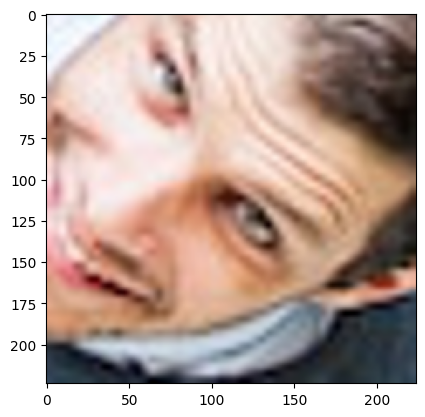

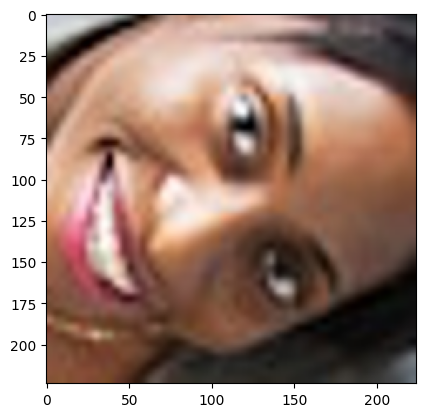

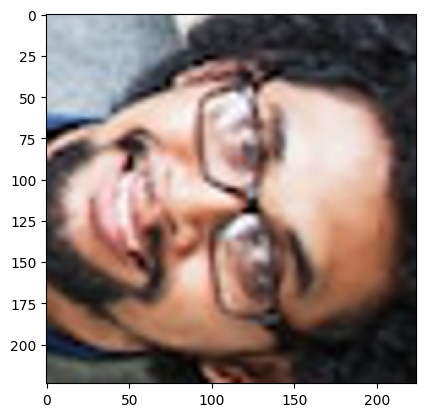

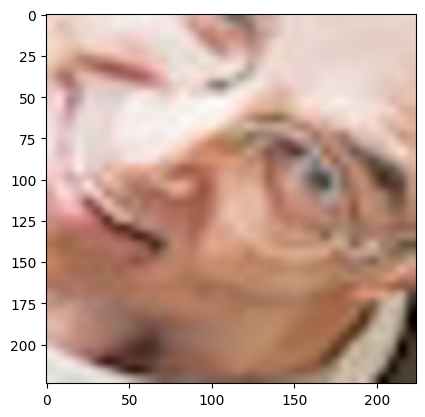

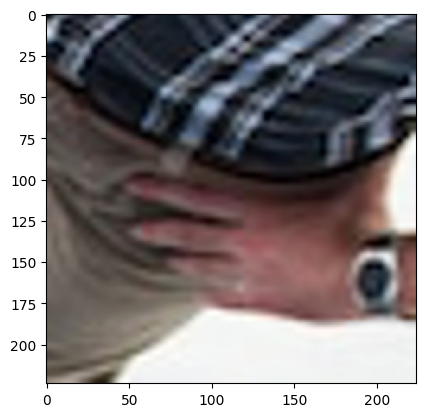

In [16]:
face.look_for_faces(img)

4/4 [==============================] - 0s 4ms/step


<Axes: >

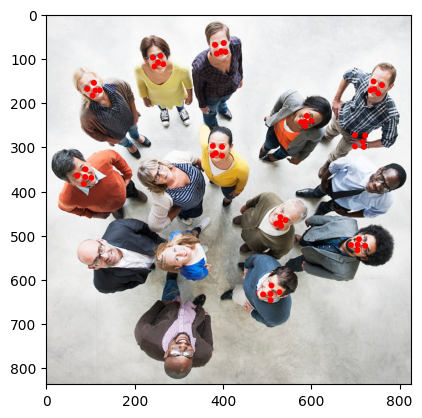

In [17]:
face.cover_facebox(img, 5, 'red')